In [1]:
import sys
sys.path.append('..')

import os
import numpy as np
import matplotlib.pyplot as plt
import skimage.transform
from PIL import Image
import random

import torch
from torch import nn

from datasets.ice import IceWithProposals
from models.basic_pga.basic_pga_parts import PropAttention
from models.axial_unet.axial_attention import AxialAttention


In [2]:
# tensor_test = torch.randn(220, 220, 10)
# img = torch.randn(1, 20, 220, 220)

prop_attn = PropAttention(3, 1, 220, None)

attn = AxialAttention(
    dim = 3,           # embedding dimension
    dim_index = 1,      # where is the embedding dimension
    heads = 1,           # number of heads for multi-head attention
    num_dimensions = 2,  # number of axial dimensions (images is 2, video is 3, or more)
)

In [3]:
data_dir = '../data'
img_scale = .3
img_crop = 220

train_set = IceWithProposals(os.path.join(data_dir, 'imgs'), os.path.join(data_dir, 'masks'),
                  os.path.join(data_dir, 'txt_files'), os.path.join(data_dir, 'proposals/binary_250_16'), 'train', img_scale, img_crop)

In [4]:
prop = train_set[5]['prop'].unsqueeze(0)
img = train_set[5]['image'].unsqueeze(0)
print(img.shape, prop.shape)

torch.Size([1, 3, 220, 220]) torch.Size([1, 1, 220, 220])


In [5]:
# img_copy = 
test = prop_attn(img, prop)
test2 = attn(img)

In [6]:
test.shape

torch.Size([1, 3, 220, 220])

In [7]:
test2.shape

torch.Size([1, 3, 220, 220])

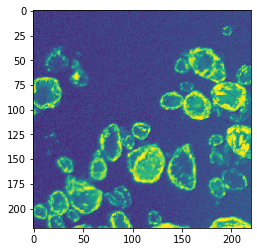

In [8]:
plt.imshow(img.squeeze(0).permute(1,2,0).detach().cpu().numpy()[:,:,2]);

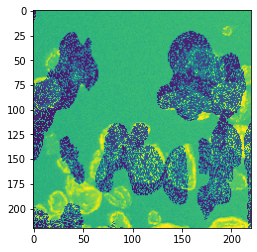

In [9]:
plt.imshow(test.squeeze(0).permute(1,2,0).detach().cpu().numpy()[:,:,0]);

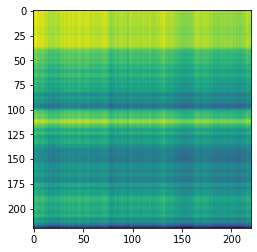

In [10]:
plt.imshow(test2.squeeze(0).permute(1,2,0).detach().cpu().numpy()[:,:,2]);

In [21]:
test

tensor([[[[-0.3804, -0.3804, -0.3804,  ..., -0.3804, -0.3804, -0.3804],
          [-0.3805, -0.3805, -0.3805,  ..., -0.3805, -0.3805, -0.3805],
          [-0.3804, -0.3804, -0.3804,  ..., -0.3804, -0.3804, -0.3804],
          ...,
          [-0.1176, -0.1176, -0.1176,  ..., -0.1176, -0.1176, -0.1176],
          [-0.1176, -0.1176, -0.1176,  ..., -0.1176, -0.1176, -0.1176],
          [-0.1176, -0.1176, -0.1176,  ..., -0.1176, -0.1176, -0.1176]],

         [[ 1.0426,  1.0426,  1.0426,  ...,  1.0426,  1.0426,  1.0426],
          [ 1.0427,  1.0427,  1.0427,  ...,  1.0427,  1.0427,  1.0427],
          [ 1.0426,  1.0426,  1.0426,  ...,  1.0426,  1.0426,  1.0426],
          ...,
          [ 0.7674,  0.7674,  0.7674,  ...,  0.7674,  0.7674,  0.7674],
          [ 0.7674,  0.7674,  0.7674,  ...,  0.7674,  0.7674,  0.7674],
          [ 0.7674,  0.7674,  0.7674,  ...,  0.7674,  0.7674,  0.7674]],

         [[-0.5525, -0.5525, -0.5525,  ..., -0.5525, -0.5525, -0.5525],
          [-0.5526, -0.5526, -

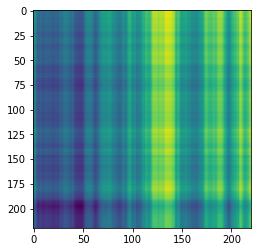

In [11]:
plt.imshow(test2.squeeze(0).permute(1,2,0).detach().cpu().numpy()[:,:,2]);

In [8]:
t1 = torch.randn(220, 10)
t2 = torch.randn(220, 10)
t3 = torch.randn(220, 10)
l = [t1, t2, t3]
t = torch.stack(l, dim=0)
t.shape

torch.Size([3, 220, 10])

In [4]:
data_dir = '../data'
img_scale = .3
img_crop = 220

train_set = IceWithProposals(os.path.join(data_dir, 'imgs'), os.path.join(data_dir, 'masks'),
                  os.path.join(data_dir, 'txt_files'), os.path.join(data_dir, 'proposals/binary_250_16'), 'train', img_scale, img_crop)

In [3]:
prop = train_set[0]['prop'].unsqueeze(0)
prop_flat = prop.flatten()

In [5]:
ice_dict, water_dict = {}, {}
ice_counter, water_counter, i = 0, 0, 0

while len(ice_dict) < len(prop_flat) or len(water_dict) < len(prop_flat):
    val = prop_flat[i]
    if val == 1 and len(ice_dict)<len(prop_flat):
        ice_dict[ice_counter] = i
        ice_counter += 1
    elif val == 0 and len(water_dict)<len(prop_flat):
        water_dict[water_counter] = i
        water_counter += 1
    if i == len(prop_flat)-1:
        i = 0
    else:
        i += 1

In [16]:
random_inds = random.sample(range(len(prop_flat)), img_crop)
ice_inds = np.array(list(ice_dict.values()))[random_inds]
ice_inds = np.array(list(ice_dict.values()))[random_inds]
prop_flat[ice_inds]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], dtype=torch.uint8)

In [23]:
ice_attend_pixels, water_attend_pixels = [], []
lenght_of_list = img_crop

while len(water_attend_pixels) < lenght_of_list or len(ice_attend_pixels) < lenght_of_list:
    pixel_ind = random.randint(0,len(prop_flat)-1)
    if prop_flat[pixel_ind] == 0 and pixel_ind not in water_attend_pixels and len(water_attend_pixels)<lenght_of_list:
        water_attend_pixels.append(pixel_ind)
    elif prop_flat[pixel_ind] == 1 and pixel_ind not in ice_attend_pixels and len(ice_attend_pixels)<lenght_of_list:
        ice_attend_pixels.append(pixel_ind)

In [32]:
prop_new = prop_flat.view(prop.shape)

In [22]:
tensor_test = torch.randn(b, t, e)
*tensor_test.shape

SyntaxError: can't use starred expression here (<ipython-input-22-344318c8cdcd>, line 2)

In [43]:
tensor_test = tensor_test.reshape(b*t, e)
tensor_test.shape

torch.Size([48400, 32])

In [49]:
t1 = tensor_test[ice_attend_pixels]
t2 = tensor_test[ice_attend_pixels]
t3 = tensor_test[ice_attend_pixels]

In [52]:
torch.stack((t1, t2, t3), dim=0).shape

torch.Size([3, 220, 32])

In [17]:
b, t, h, e = 220, 220, 2, 32
tensor_test = torch.randn(b, t, h*e)
tensor_test.shape

torch.Size([220, 220, 64])

In [40]:
tensor_test = tensor_test.reshape(b, -1, e, h)
tensor_test.shape

torch.Size([220, 220, 32, 2])

In [39]:
tensor_test = tensor_test.transpose(1, 2)
tensor_test.shape

torch.Size([220, 2, 220, 32])